## The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post-hoc comparisons between groups are required to determine which groups are different.

## The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy
import scikit_posthocs as sp
from scipy import stats
%matplotlib inline
fn=glob.glob("*xlsx")
print(fn)

['wavelenght different techniques.xlsx']


In [21]:
FA=pd.read_excel(fn[0])
#FA=pd.read_excel(fn[0],header=False)
COLS=list(FA.columns.values)
print(COLS)

['sample', 'lambda', 'Unnamed: 2']


In [22]:
FA

,sample,lambda,Unnamed: 2
0,stg5_AFM,898.200,319
1,stg5_AFM,1112.000,NaN
2,stg5_AFM,1069.000,NaN
3,stg5_AFM,855.500,NaN
4,stg5_AFM,1027.000,NaN
...,...,...,...
2090,stg5_cryoSEM,1263.088,NaN
2091,stg5_cryoSEM,896.619,NaN
2092,stg5_cryoSEM,1141.879,NaN
2093,stg5_cryoSEM,938.260,NaN


In [5]:
GTYPES=list(set(FA[COLS[0]]))
FA.groupby(COLS[0]).size()

sample
stg3            456
stg4            821
stg4_cryoSEM     78
stg5            622
stg5_AFM         19
stg5_cryoSEM     99
dtype: int64

In [6]:
values_per_group = {col_name:col for col_name, col in FA.groupby(COLS[0])[COLS[1]]}
#print(values_per_group.values())

In [7]:
stat,p = stats.kruskal(*values_per_group.values())
print('Statistics=%.3f, p=%.20f' % (stat, p))
print(p)
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=18.002, p=0.00294394479229011284
0.002943944792290113
Different distributions (reject H0)


# P value tells us we may reject the null hypothesis that the population medians of all of the groups are equal. To learn what groups (species) differ in their medians we need to run post hoc tests. scikit-posthocs provides a lot of non-parametric tests mentioned above. Let's choose Conover's test.

In [8]:
pc=sp.posthoc_conover(FA, val_col=COLS[1], group_col=COLS[0], p_adjust = 'holm')
print(pc)

                  stg3      stg4  stg4_cryoSEM      stg5  stg5_AFM  \
stg3         -1.000000  1.000000      0.019068  1.000000  0.583905   
stg4          1.000000 -1.000000      0.059801  0.785740  0.785740   
stg4_cryoSEM  0.019068  0.059801     -1.000000  0.005673  1.000000   
stg5          1.000000  0.785740      0.005673 -1.000000  0.435492   
stg5_AFM      0.583905  0.785740      1.000000  0.435492 -1.000000   
stg5_cryoSEM  1.000000  1.000000      0.785740  0.954207  1.000000   

              stg5_cryoSEM  
stg3              1.000000  
stg4              1.000000  
stg4_cryoSEM      0.785740  
stg5              0.954207  
stg5_AFM          1.000000  
stg5_cryoSEM     -1.000000  


(<matplotlib.axes._subplots.AxesSubplot at 0x7fbefe314110>,
 <matplotlib.colorbar.ColorbarBase at 0x7fbefe27e9d0>)

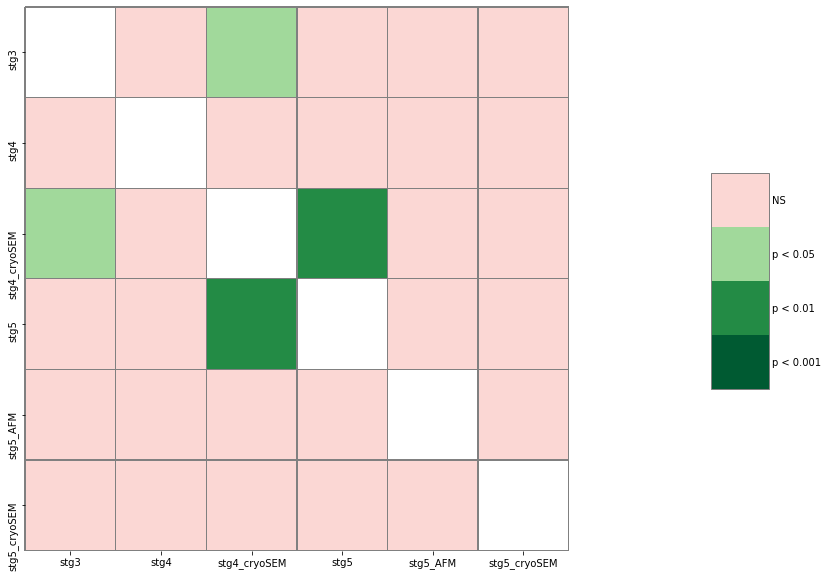

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)


In [10]:
pc2=sp.posthoc_dunn(FA, val_col=COLS[1], group_col=COLS[0], p_adjust = 'holm')
print(pc2)

                  stg3      stg4  stg4_cryoSEM      stg5  stg5_AFM  \
stg3         -1.000000  1.000000      0.019448  1.000000  0.590607   
stg4          1.000000 -1.000000      0.060891  0.793623  0.793623   
stg4_cryoSEM  0.019448  0.060891     -1.000000  0.005788  1.000000   
stg5          1.000000  0.793623      0.005788 -1.000000  0.441064   
stg5_AFM      0.590607  0.793623      1.000000  0.441064 -1.000000   
stg5_cryoSEM  1.000000  1.000000      0.793623  0.961726  1.000000   

              stg5_cryoSEM  
stg3              1.000000  
stg4              1.000000  
stg4_cryoSEM      0.793623  
stg5              0.961726  
stg5_AFM          1.000000  
stg5_cryoSEM     -1.000000  


## Post hoc pairwise test for multiple comparisons of mean rank sums (Dunn’s test). May be used after Kruskal-Wallis one-way analysis of variance by ranks to do pairwise comparisons.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbefe260fd0>,
 <matplotlib.colorbar.ColorbarBase at 0x7fbef9983ad0>)

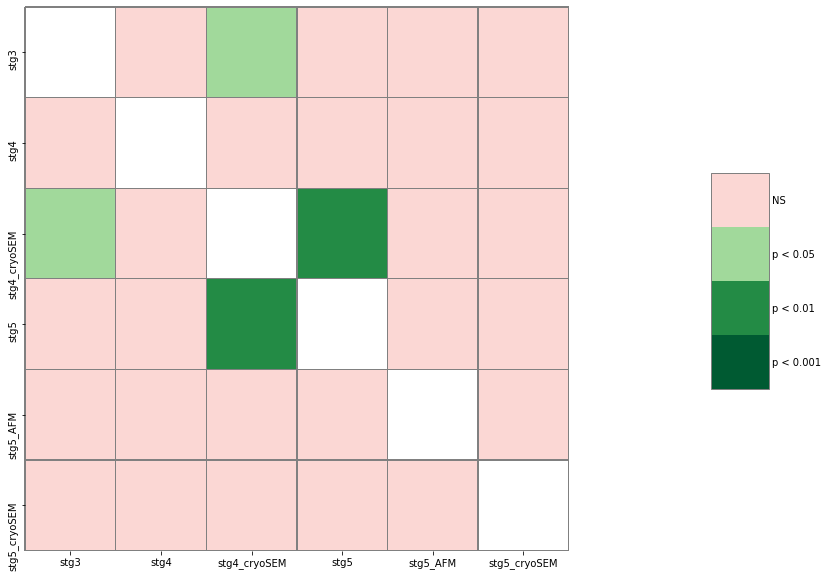

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc2, **heatmap_args)


In [12]:
import seaborn as sns

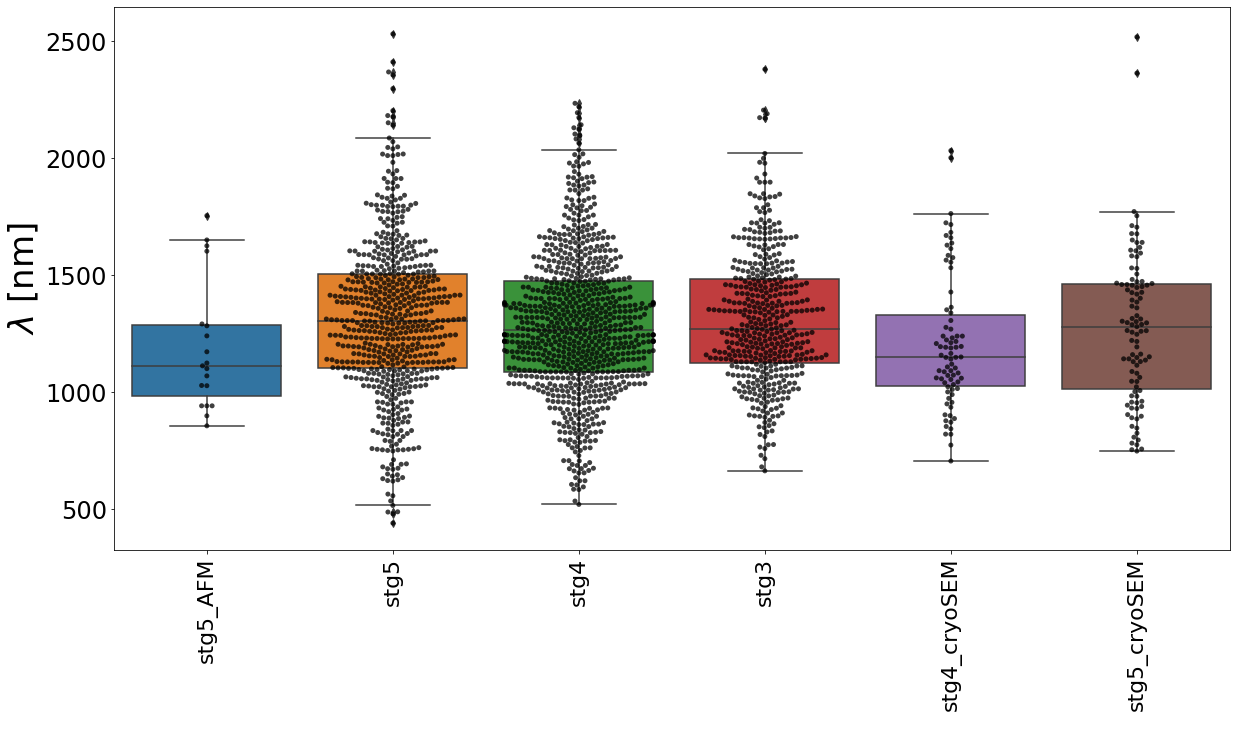

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
bplot=sns.boxplot(y=COLS[1],x=COLS[0],data=FA)

bplot=sns.swarmplot(y=COLS[1],x=COLS[0],data=FA,color='black',alpha=0.75)
plt.yticks(fontsize=24)
plt.xticks(fontsize=22, rotation="vertical")
plt.ylabel(r"$\lambda$ [nm]", fontsize=34)
plt.xlabel(" ", fontsize=34)
plt.savefig("boxplotlambda_alltechniques.jpeg",dpi=400,bbox_inches ="tight")

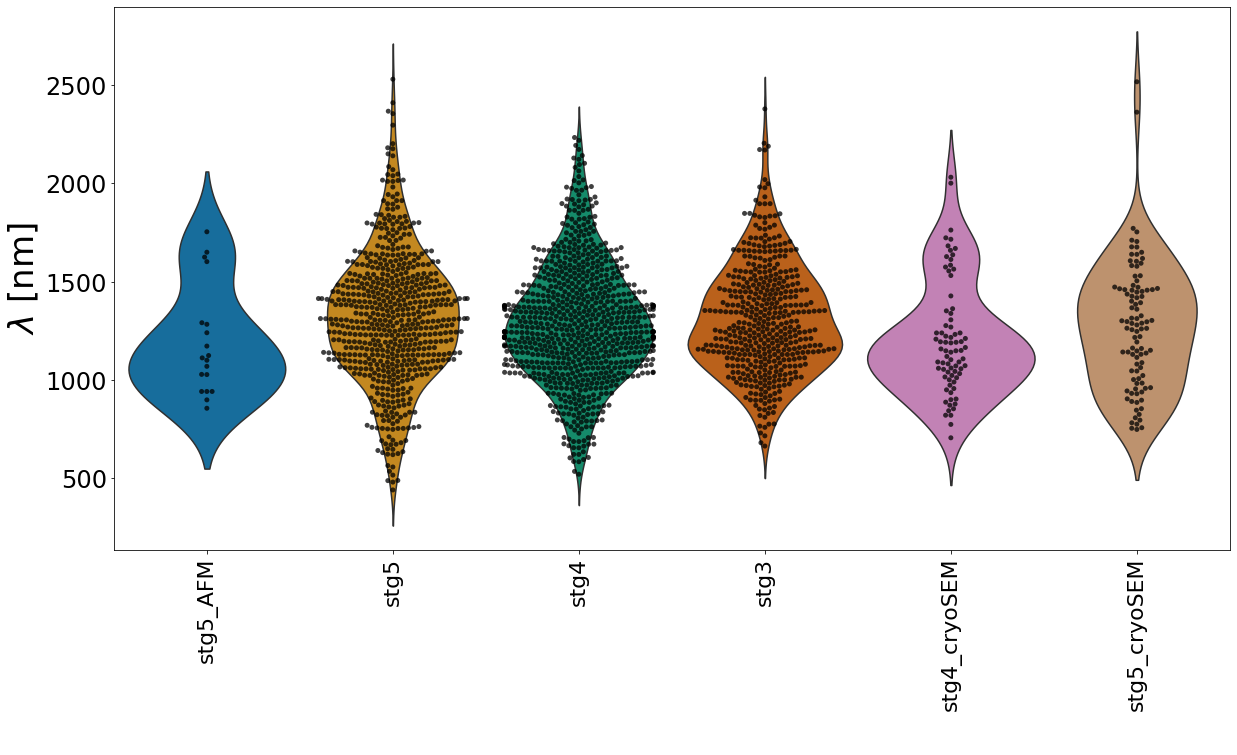

In [18]:
fig, ax  = plt.subplots(1, 1, figsize=(20, 10))

plt.yticks(size=24)
plt.xticks(fontsize=22, rotation="vertical")
bplot=sns.violinplot(y=COLS[1],x=COLS[0],
                 data=FA, 
                 width=0.90,
                 alpha=0.17,
                 inner=None,
                 palette="colorblind")
bplot=sns.swarmplot(y=COLS[1],x=COLS[0],data=FA,color='black',alpha=0.75)
plt.ylabel(r"$\lambda$ [nm]", fontsize=34)
plt.xlabel(" ", fontsize=34)
plt.savefig("violijnplot_lambda all techniques.png",dpi=400,bbox_inches ="tight")

In [19]:
FA

,sample,lambda,Unnamed: 2
0,stg5_AFM,898.200,319
1,stg5_AFM,1112.000,NaN
2,stg5_AFM,1069.000,NaN
3,stg5_AFM,855.500,NaN
4,stg5_AFM,1027.000,NaN
...,...,...,...
2090,stg5_cryoSEM,1263.088,NaN
2091,stg5_cryoSEM,896.619,NaN
2092,stg5_cryoSEM,1141.879,NaN
2093,stg5_cryoSEM,938.260,NaN


In [20]:
Sn=list(set(FA['sample']))
mu=pd.DataFrame()
A=[]
B=[]
C=[]
for k in Sn:
    fj=FA.loc[FA['sample']==k]
    u=fj['lambda'].describe()
    #print(k)
    #print(u)
    #print('median:', fj['lambda'].median())
    A.append(k)
    B.append(fj['lambda'].median())
    C.append(fj['lambda'].mean())
    #print('*******************')
mu['sample']=A
mu['median-lambda']=B
mu['mean-lamdba']=C
print(mu)

         sample  median-lambda  mean-lamdba
0  stg4_cryoSEM      1149.0215  1207.788603
1          stg5      1305.4015  1313.780725
2          stg4      1266.1600  1289.285833
3          stg3      1269.6845  1308.788827
4  stg5_cryoSEM      1279.6740  1269.972101
5      stg5_AFM      1112.0000  1192.300000
